# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID: 16  <br>
TEAM-NAME: spacex <br>
YOUR-ID:  <br>
YOUR-NAME:   <br>



## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [1]:
# Only allowed to use these libraries for this assignment. 
# Setup: Just activate Assignment-1's environment and install matplotlib `python -m pip install -U matplotlib`

import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [2]:
#() Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
# Replace "pass" statement with your code (You can split this cell into
# multiple cells if you wish to)
def gaussian(xVec, a, m, s):
    # Returning an array of gaussian sampled values dictated by the given parameters.
    return a*np.exp(-((xVec-m)**2)/(2*(s**2)))
    
def jacobian(xVec, a, m, s):
    # Calculates the Jacobian of the gaussian distribution.
    row1 = []
    row2 = []
    row3 = []
    
    for x in xVec:
        row1.append(math.exp(- (x - m) ** 2 / (2 * s ** 2))) 
        
    for x in xVec:
        row2.append((a* (x - m)/(s ** 2))*math.exp((- np.square(x - m) / (2 * np.square(s))))) 

    for x in xVec:
        row3.append((a/(s ** 3)) * ((x - m) ** 2) * math.exp((- (x - m) ** 2 / (2 * s ** 2)))) 
    
    row1 = np.array([row1])
    row2 = np.array([row2])
    row3 = np.array([row3])

    return np.vstack((row1, np.vstack((row2, row3)))).T
    
def residual(xVec, a, m, s, yObserved):
    # Calculating the residual, the difference between the observed and the calculated value
    obs = len(xVec)
    output = []
    
    for i in range(obs):
        output.append(a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])
    output = np.array(output)
        
    return output
    
def loss(xVec, a, m, s, yObserved):
    # Formulating loss as a non linear least squares optimization.
    obs = len(xVec)
    output = []
    for i in range(obs):
        output.append((a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])**2)
    output = np.array(output)
    return np.sum(output)

    
def plot(xObserved,yObserved, yPredicted,squaredDistance,tit):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(squaredDistance)
    plt.title('loss vs number of iterations for '+str(tit))
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.subplot(122)
    plt.plot(xObserved,yObserved,label='Ground Truth')
    plt.plot(xObserved,yPredicted,label='Predicted')
    plt.plot(xObserved,yObserved,'b.')
    
    plt.title('Predicted vs GT Gaussians by '+str(tit))
    plt.legend()
    plt.show()

def gradDescent(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    converged = 0
    iterations = 1000
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        nllsJack = np.matmul(jack.T, res)
        calculatedPrameters = calculatedPrameters - lr * nllsJack

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Convergence in gradient descent achieved at",i," iteration")
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"GD")
            converged = 1
            break
    if(converged==0):
        print("gradient descent algorithm did'nt converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gradient Descent")
    return yPredicted,np.array(loss_arr)
def gaussNewton(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    converged = 0
    iterations = 1000
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        calculatedPrameters = calculatedPrameters - np.linalg.pinv(jack)@res

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Convergence in Gauss Newton achieved at",i," iteration")
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gauss Newton")
            converged = 1
            break
    if(converged==0):
        print("Gauss Newton Algorithm did'nt converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gauss Newton")
    return yPredicted,np.array(loss_arr)
def LM(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    """
    if learning rate is less than 0.0001 then on dividing by 10 further svd(np.linalg.pinv finds sudo inverse using svd) is not able to find sol and error is thrown
    Hence explicitly handling it by not decreasing learning rate if it is already less than 0.00001
    """
    iterations = 1000
    loss_arr = []
    converged = 0
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        jack = jack.astype('float64') 
        I_lr = lr*np.eye(jack.shape[1])
        I_lr = I_lr.astype('float64') 
        nllsJack = np.linalg.pinv((jack.T@jack)+(I_lr))@jack.T   
                
        calculatedPrameters = calculatedPrameters - nllsJack@res
        currloss = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        
        if(i!=0):
            if currloss<=squaredDistance:
                if(lr>0.00001):
                    lr/= 10
            else:
                lr*= 10
    
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        jack = jack.astype('float64') 
        I_lr = lr*np.eye(jack.shape[1])
        I_lr = I_lr.astype('float64') 
        nllsJack = np.linalg.pinv((jack.T@jack)+(I_lr))@jack.T   
                
        calculatedPrameters = calculatedPrameters - nllsJack@res

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Convergence in LM achieved at",i," iteration")
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"LM")
            converged = 1
            
            break
    if(converged==0):
        print("LM Algorithm did'nt converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"LM")
    return yPredicted,np.array(loss_arr)
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################


In [3]:
def combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)

   
    plt.plot(lgd,'r--',label='GD')
    plt.plot(lgn,'m.',label='GN')
    plt.plot(llm,'g*',label='LM')
    plt.title('loss vs number of iterations')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.legend()


    plt.subplot(122)
    
    plt.plot(xObserved,yObserved,label='Ground Truth')
    plt.plot(xObserved,yObserved,'b.')
    plt.plot(xObserved,ygd,'r',label='GD')
    plt.plot(xObserved,ygn,'m',label='GN')
    plt.plot(xObserved,ylm,'g',label='LM')
    plt.title('Combined Data and fit plot')
    plt.legend()
  
    plt.show()
    

Convergence in gradient descent achieved at 437  iteration
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


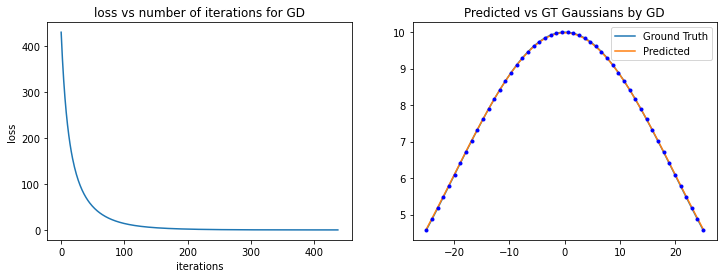

Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192


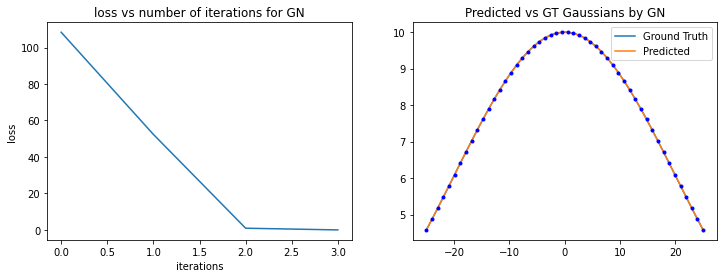

Convergence in LM achieved at 2  iteration
loss: 5.730362110598665
a_est: 10.254077061575403  m_est: -1.0498505979479578  s_est: 18.798688886556167


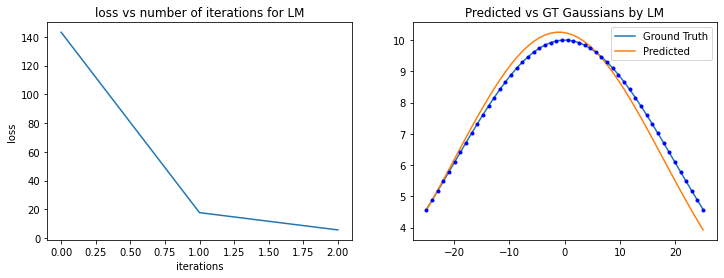

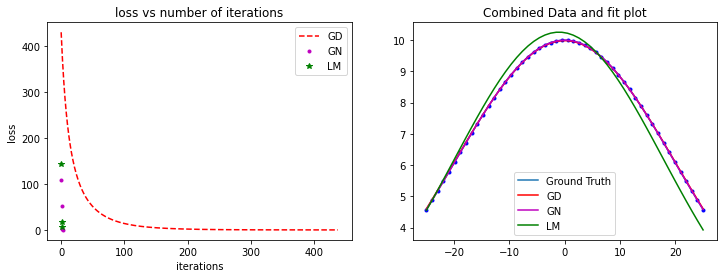

In [4]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1                                              #
# Tester code -- EVERYTHING IN ONE CELL

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])

ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
plot(xObserved,yObserved,ygd, lgd,"GD")
ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
plot(xObserved,yObserved, ygn, lgn,"GN")
ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
plot(xObserved,yObserved, ylm, llm,"LM")
combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)



##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

# Optimising Gradient descent parameters

Convergence in gradient descent achieved at 534  iteration
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015614e-05  s_est: 20.02827347657325


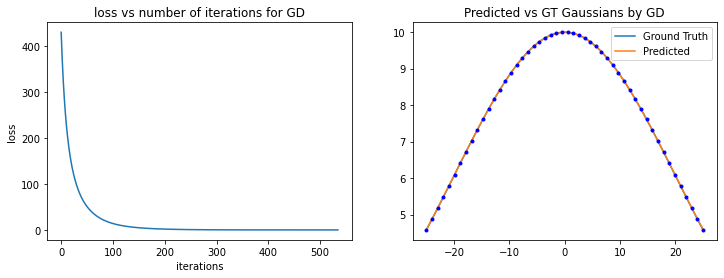

In [5]:

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-3)
plot(xObserved,yObserved,ygd, lgd,"GD")

Convergence in gradient descent achieved at 534  iteration
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015614e-05  s_est: 20.02827347657325


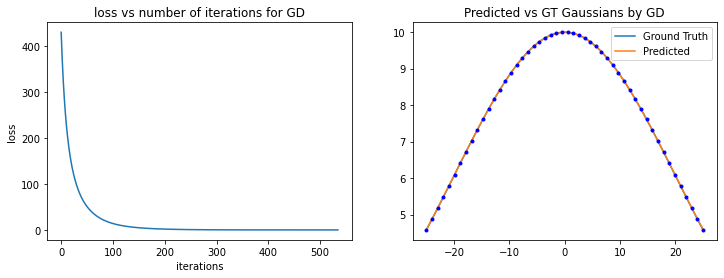

Convergence in gradient descent achieved at 437  iteration
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


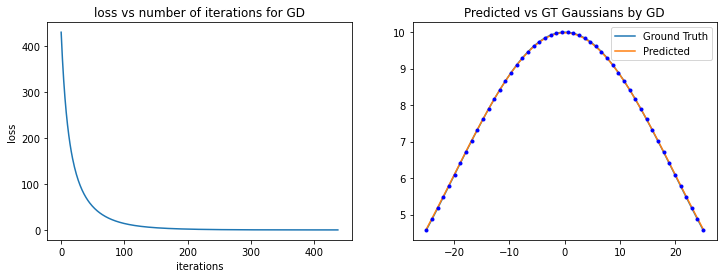

Convergence in gradient descent achieved at 337  iteration
loss: 0.09899244775254672
a_est: 9.948877534392215  m_est: 0.006139702817200705  s_est: 20.288135634862776


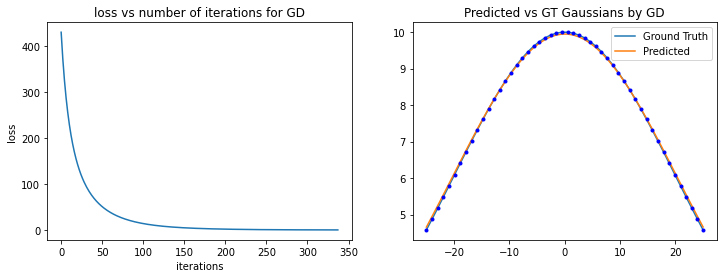

Convergence in gradient descent achieved at 229  iteration
loss: 0.9871879843820822
a_est: 9.840596816487373  m_est: 0.10601728929519547  s_est: 20.93342186690136


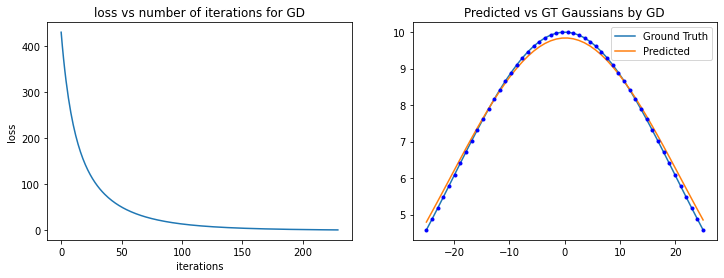

Convergence in gradient descent achieved at 115  iteration
loss: 9.829260268328731
a_est: 9.608692938123435  m_est: 1.4171677571178727  s_est: 22.522468934557253


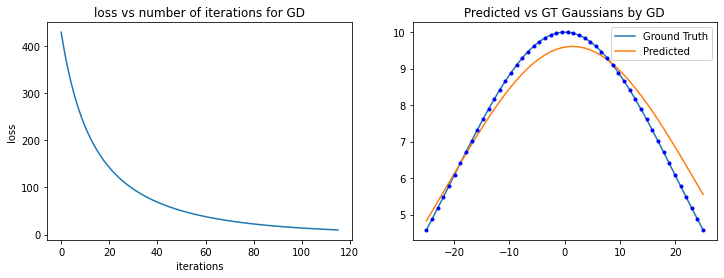

Convergence in gradient descent achieved at 30  iteration
loss: 96.50726091112924
a_est: 9.640735602761751  m_est: 6.91689953829249  s_est: 22.826981339510326


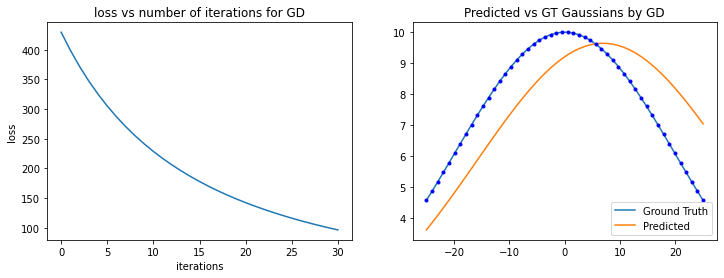

In [6]:
tolerance = [1e-3,1e-2,1e-1,1,1e+1,1e+2]
for t in tolerance:
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,t)
    plot(xObserved,yObserved,ygd, lgd,"GD")

gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.0001
loss: 244.48737461270264
a_est: 9.918497561085035  m_est: 10.42188691583679  s_est: 21.134393038947387


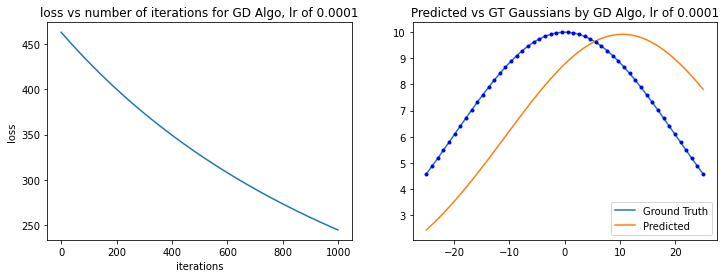

gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.001
loss: 14.123791568974372
a_est: 9.582518592742808  m_est: 1.9573486106891116  s_est: 22.74004930353681


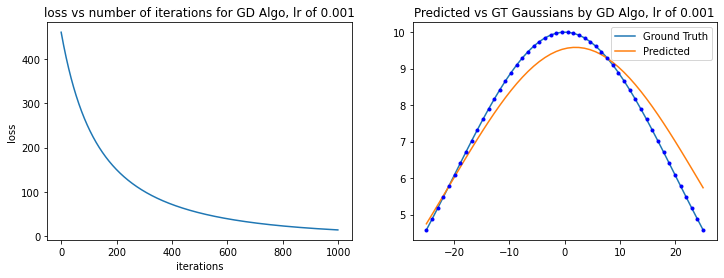

Convergence in gradient descent achieved at 437  iteration
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


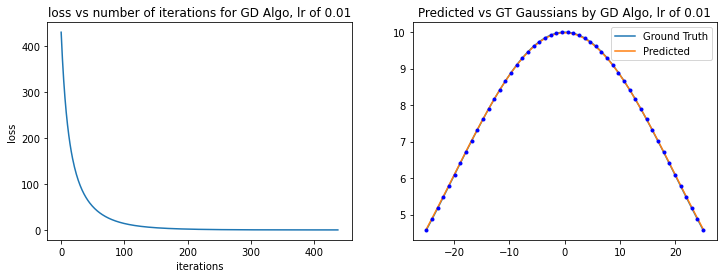

gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.1
loss: 3226.679414252767
a_est: -125.51620545318187  m_est: 80.49221057521616  s_est: -9.042245279619415


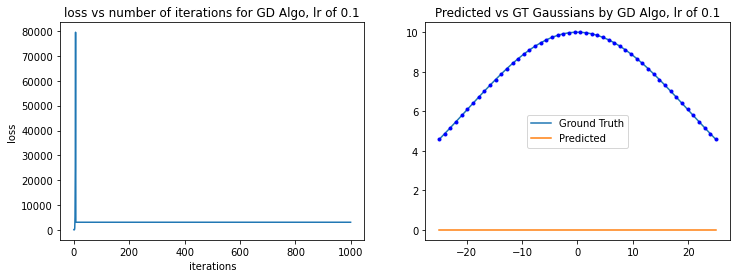

gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 1.0
loss: 251.12364291814873
a_est: 440142.66885355505  m_est: -167867.68666039224  s_est: -36167.47894579422


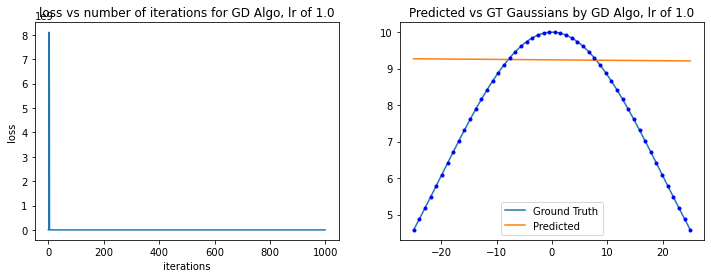

In [7]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
calculatedPrameters = np.array([a_est, m_est, s_est])
learningrate = np.array([0.0001,0.001,0.01,0.1,1])

for l in learningrate:
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,l,1e-2)
    plot(xObserved,yObserved,ygd, lgd,"GD Algo, lr of "+str(l))

As we see on increasing tolerance the algo converges in less number of iterations but loss starts increasing

# Comparing among the 3 algorithms 

Setting learning rate for LM as 10, from experimentations(on reducing it doesnt converge(explanable since learning rate is multiplied or divided by 10 depending on error is reduced or increased)


 tolerance  0.001
Convergence in gradient descent achieved at 534  iteration
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015614e-05  s_est: 20.02827347657325
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.001  learning rate 1e-05
loss: 7.725367181265507
a_est: 9.46380697983507  m_est: 0.07721116212084483  s_est: 20.31383197715235


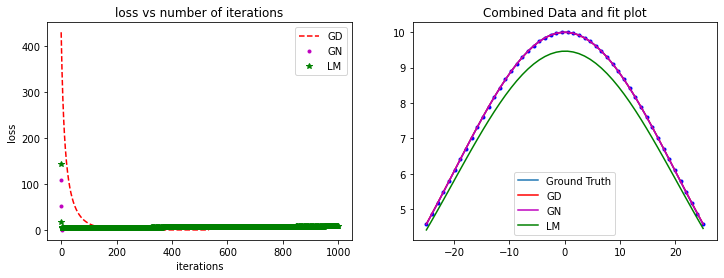


 tolerance  0.01
Convergence in gradient descent achieved at 437  iteration
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 1e-05
loss: 7.725367181265507
a_est: 9.46380697983507  m_est: 0.07721116212084483  s_est: 20.31383197715235


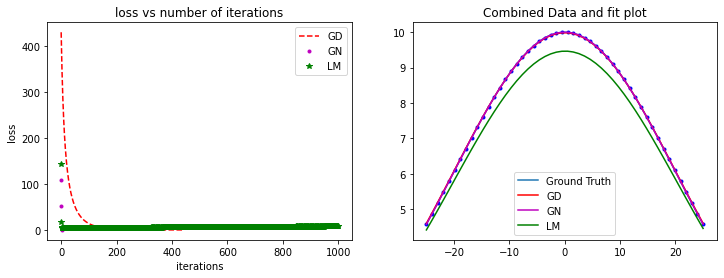


 tolerance  0.1
Convergence in gradient descent achieved at 337  iteration
loss: 0.09899244775254672
a_est: 9.948877534392215  m_est: 0.006139702817200705  s_est: 20.288135634862776
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1e-05
loss: 7.725367181265507
a_est: 9.46380697983507  m_est: 0.07721116212084483  s_est: 20.31383197715235


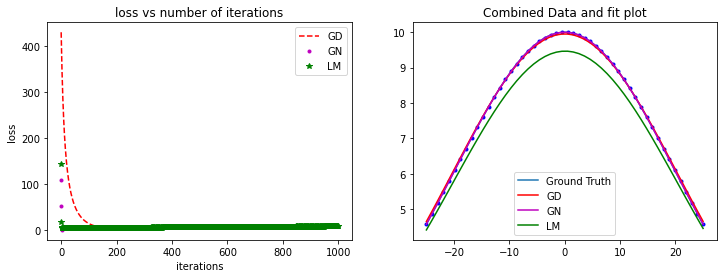


 tolerance  1.0
Convergence in gradient descent achieved at 229  iteration
loss: 0.9871879843820822
a_est: 9.840596816487373  m_est: 0.10601728929519547  s_est: 20.93342186690136
Convergence in Gauss Newton achieved at 2  iteration
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 1.0  learning rate 1e-05
loss: 7.725367181265507
a_est: 9.46380697983507  m_est: 0.07721116212084483  s_est: 20.31383197715235


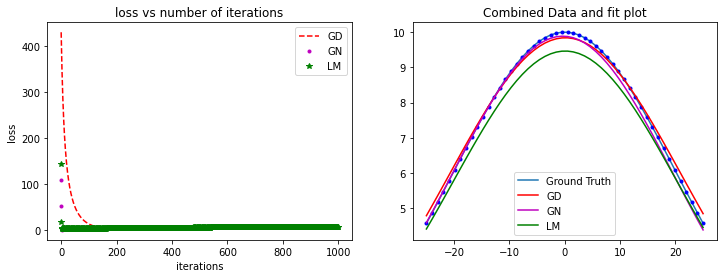


 tolerance  10.0
Convergence in gradient descent achieved at 115  iteration
loss: 9.829260268328731
a_est: 9.608692938123435  m_est: 1.4171677571178727  s_est: 22.522468934557253
Convergence in Gauss Newton achieved at 2  iteration
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
Convergence in LM achieved at 2  iteration
loss: 5.730362110598665
a_est: 10.254077061575403  m_est: -1.0498505979479578  s_est: 18.798688886556167


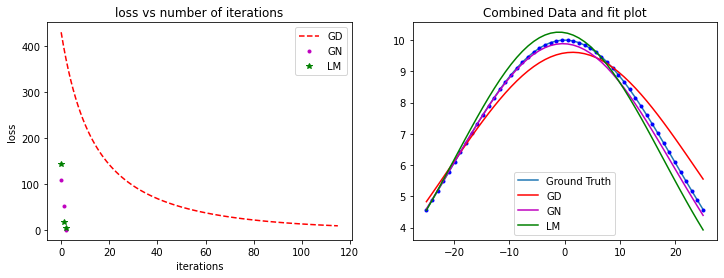


 tolerance  100.0
Convergence in gradient descent achieved at 30  iteration
loss: 96.50726091112924
a_est: 9.640735602761751  m_est: 6.91689953829249  s_est: 22.826981339510326
Convergence in Gauss Newton achieved at 1  iteration
loss: 52.36132656683978
a_est: 9.855255737881372  m_est: -2.4823688211532247  s_est: 17.191041633602573
Convergence in LM achieved at 1  iteration
loss: 17.75304170370217
a_est: 9.259792284703648  m_est: 1.6736784343233468  s_est: 23.874714922894466


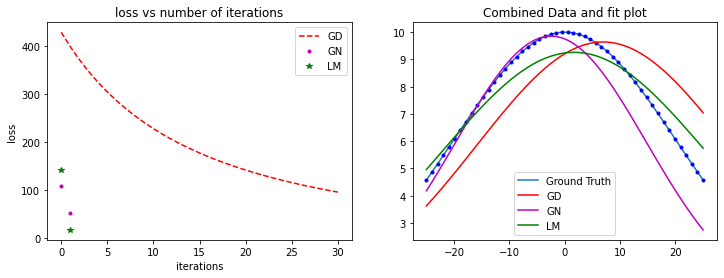

In [8]:

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
tolerance = np.array([1e-3,1e-2,1e-1,1,1e+1,1e+2])
for tol in tolerance:
    print("\n tolerance ",tol)
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,tol)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,tol)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,tol)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)


Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?

for a_est: 20.0  m_est: 13.0  s_est: 19.2
Convergence in gradient descent achieved at 401  iteration
loss: 0.009796680630617503
a_est: 9.983914372250908  m_est: 0.0006691704240702463  s_est: 20.08957755979924
Convergence in Gauss Newton achieved at 3  iteration
loss: 0.000299813684922257
a_est: 9.997568405154453  m_est: -0.007860524973484884  s_est: 20.003165014529056
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 3226.679398346162
a_est: 3.6978394936423724  m_est: 86.13024517283249  s_est: 5.001068009903843


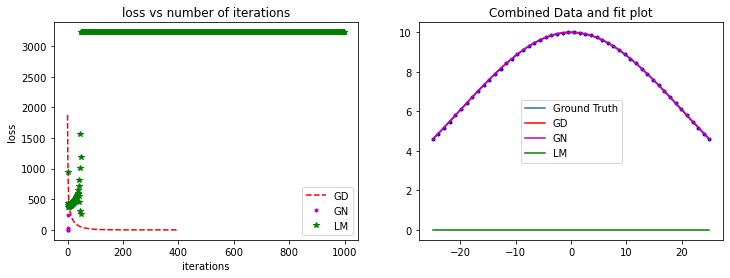

for a_est: 15.0  m_est: 15.0  s_est: 30.0
Convergence in gradient descent achieved at 890  iteration
loss: 0.009864920462375382
a_est: 9.983857418338392  m_est: 1.4524153694149432e-05  s_est: 20.089896470068705
Convergence in Gauss Newton achieved at 2  iteration
loss: 0.004347443763877181
a_est: 9.984687614860787  m_est: -0.0008925681619234016  s_est: 20.031617130516278
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 776.5839481183266
a_est: 14.931537670184403  m_est: 0.017300870121228523  s_est: 19.901345478412757


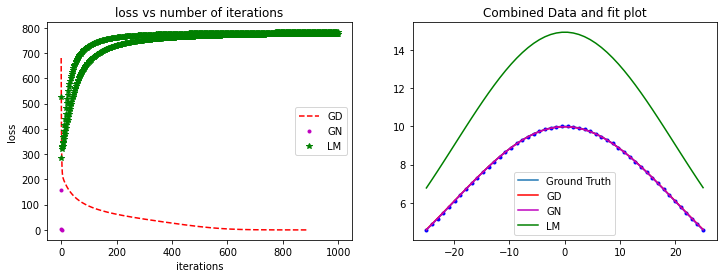

for a_est: 0.0  m_est: 5.0  s_est: 30.0
Convergence in gradient descent achieved at 657  iteration
loss: 0.009952980128885996
a_est: 9.983785522880186  m_est: 2.0620867812463206e-05  s_est: 20.090299064355474
Convergence in Gauss Newton achieved at 4  iteration
loss: 8.389378771688895e-06
a_est: 9.999896348612031  m_est: -0.0009580232171931269  s_est: 19.998668017574058
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 506.77211900980853
a_est: 6.0294857659936945  m_est: 0.019331849067777573  s_est: 20.07169720036156


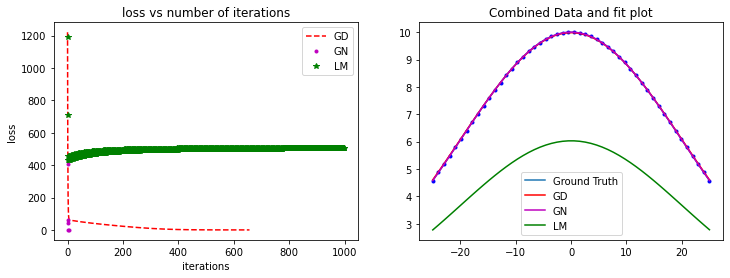

for a_est: 10.0  m_est: 5.0  s_est: 45.0
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.18849619500227
a_est: 8.969901434120136  m_est: 0.12338061041094336  s_est: 28.942726366387507
Convergence in Gauss Newton achieved at 4  iteration
loss: 2.8551279852934357e-06
a_est: 9.999949564582622  m_est: -0.000549485613638781  s_est: -19.99918552898828
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 142.10603671570735
a_est: 12.120355943730353  m_est: 0.0012465061080827282  s_est: 19.89664048117953


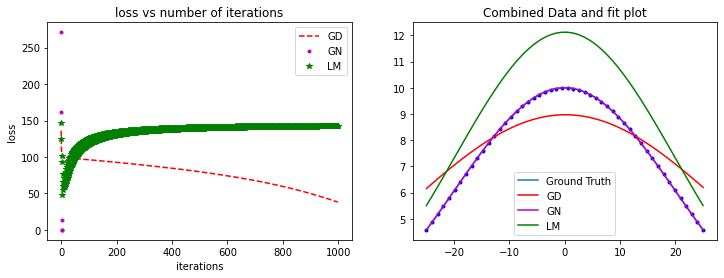

In [9]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
ests = np.array([[20,13,19.2],[15,15,30],[0,5,30],[10,5,45]])
for calculatedPrameters in ests:
    print("for a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)


Observation: gauss newton is able to handle really far off estimates well, Gradient descent too handles to some extent. But LM is not able to handle far off estimations <br>
Note: the first graph seems to be shooting out of scale just becoause the LM algorithm didnt converge and overshotted to large values. But the GD and NM had converged.

Different number of observations: Can a particular algorithm handle very less observations?

for 3 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 12.810563193203759
a_est: 7.294684254352  m_est: 4.297665940094786  s_est: 43.592465589006416
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.392625656043453e-05
a_est: 9.998244588638427  m_est: -0.0036187727889811505  s_est: -19.98710431578631
Convergence in LM achieved at 3  iteration
loss: 5.8713982825295865
a_est: 7.912261994938874  m_est: -0.5284501715846743  s_est: 28.89854552453879


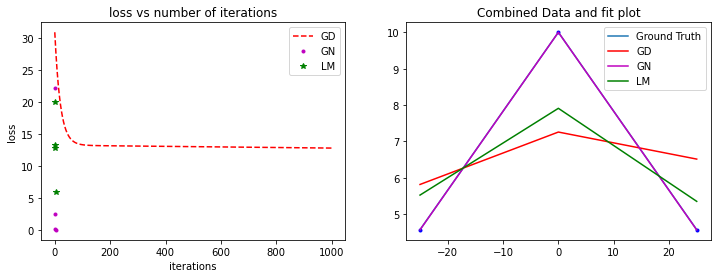

for 5 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 14.53206008502124
a_est: 7.863127904599456  m_est: 3.9810583385192375  s_est: 43.30548274504767
Convergence in Gauss Newton achieved at 3  iteration
loss: 0.0070155988244037714
a_est: 9.982448276627636  m_est: 0.03373519885723952  s_est: -19.892406162819146
Convergence in LM achieved at 3  iteration
loss: 5.217692398340133
a_est: 8.315350470432676  m_est: -1.4110666938617307  s_est: 25.4091574580058


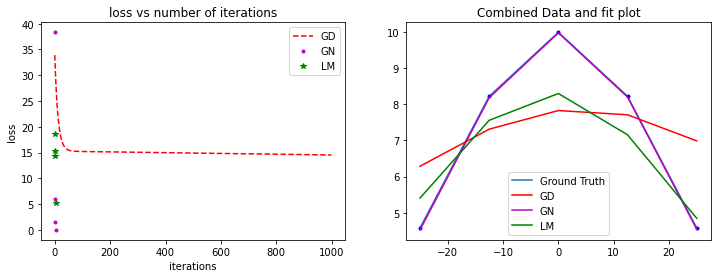

for 8 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 19.18183621802356
a_est: 8.117930289445017  m_est: 3.5315582026017753  s_est: 42.717970130675575
Convergence in Gauss Newton achieved at 3  iteration
loss: 0.0077302806827764395
a_est: 9.988577199087958  m_est: -0.030128415358789074  s_est: -19.89809957757157
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 39.57348838924616
a_est: 7.103742112586621  m_est: -0.01961794164542771  s_est: 20.090459512985007


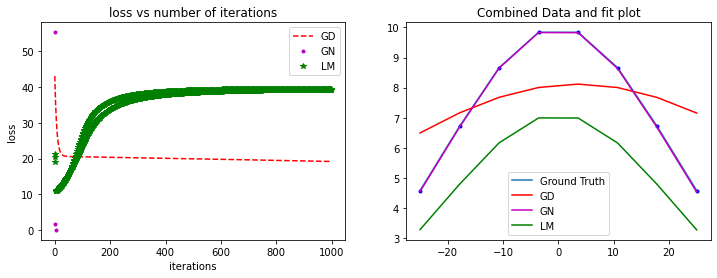

for 10 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 22.26011891799478
a_est: 8.199698846827218  m_est: 3.2481737193264504  s_est: 42.29147012641224
Convergence in Gauss Newton achieved at 3  iteration
loss: 0.00786459119096223
a_est: 9.985447214572805  m_est: -0.05710307896642841  s_est: -19.93203448923023
Convergence in LM achieved at 34  iteration
loss: 9.647267117705812
a_est: 10.152171776417127  m_est: 1.6313412104104403  s_est: 24.55955350924672


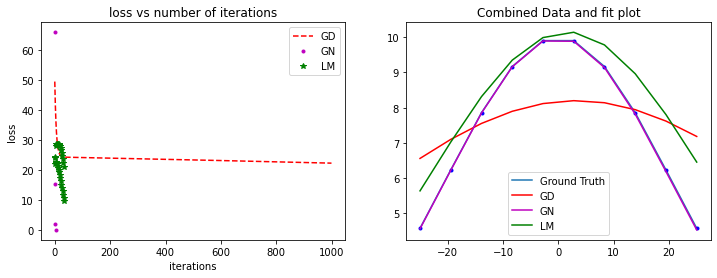

for 12 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 25.24847203960771
a_est: 8.256100462938628  m_est: 2.977366620428282  s_est: 41.84363531919719
Convergence in Gauss Newton achieved at 3  iteration
loss: 0.008471865756035276
a_est: 9.98075694969458  m_est: -0.06882382598615511  s_est: -19.966465184641056
Convergence in LM achieved at 18  iteration
loss: 9.101761699327625
a_est: 9.83176158180403  m_est: 1.1484071267408353  s_est: 25.35997671862018


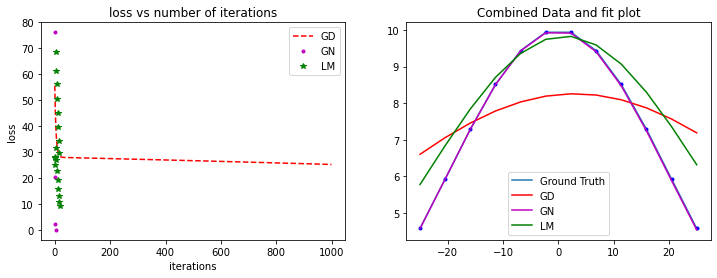

for 15 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 29.515258706353507
a_est: 8.317735304141657  m_est: 2.594417590382066  s_est: 41.134968118113896
Convergence in Gauss Newton achieved at 3  iteration
loss: 0.009719032635457953
a_est: 9.974072170598296  m_est: -0.06938762605330862  s_est: -20.008381454161505
Convergence in LM achieved at 12  iteration
loss: 8.593574704214939
a_est: 9.11325391697239  m_est: 0.6918306308314784  s_est: 26.431712579881456


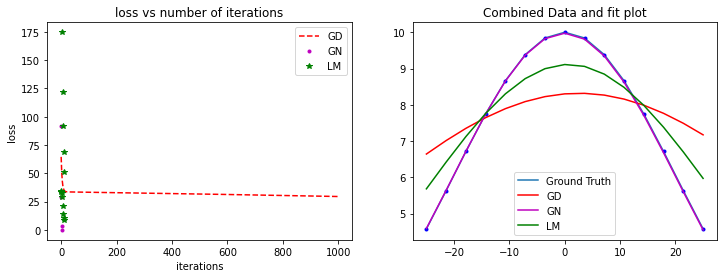

for 20 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 35.93130132069082
a_est: 8.394526490914519  m_est: 2.0174636595620563  s_est: 39.856855411409036
Convergence in Gauss Newton achieved at 4  iteration
loss: 2.3857578173174504e-07
a_est: 9.999961027966563  m_est: 0.00033668476813428216  s_est: -19.99976952720658
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 48.33332084868689
a_est: 11.979994188146293  m_est: -0.0011672273690913268  s_est: 19.88953144179293


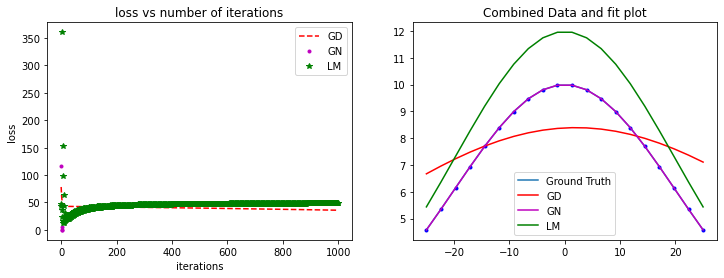

for 22 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.21412956776219
a_est: 8.421676611465672  m_est: 1.8079653522095283  s_est: 39.31062904290413
Convergence in Gauss Newton achieved at 4  iteration
loss: 3.271145691785934e-07
a_est: 9.999969172763976  m_est: 0.0003167783836811183  s_est: -19.999638954474374
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 63.42881331965549
a_est: 12.155399951012852  m_est: -0.0008774671271427562  s_est: 19.897447312671414


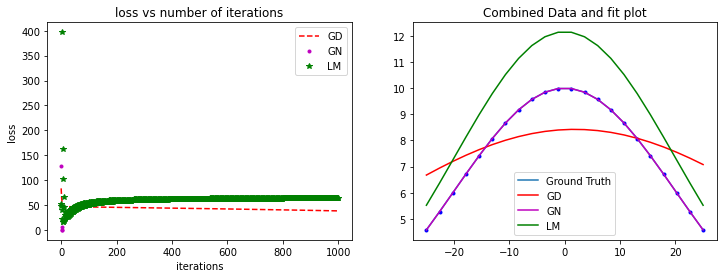

for 25 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 41.285518445649984
a_est: 8.46153090267852  m_est: 1.5164068052808461  s_est: 38.45169482685636
Convergence in Gauss Newton achieved at 4  iteration
loss: 4.738859213669028e-07
a_est: 9.999978227404668  m_est: 0.00024522361793435574  s_est: -19.9994749139841
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 88.17009382214152
a_est: 12.375320183832788  m_est: -0.0006796303941668524  s_est: 19.90554217307271


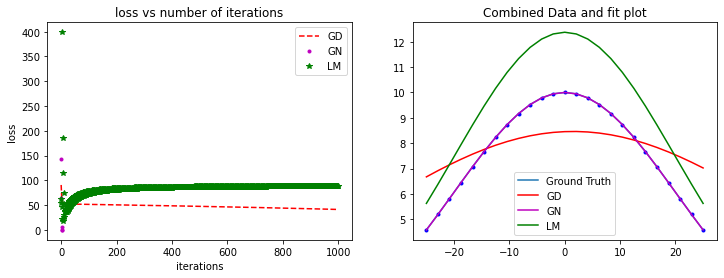

for 28 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 43.876586797733545
a_est: 8.502077473135923  m_est: 1.2520033545850304  s_est: 37.542498492396334
Convergence in Gauss Newton achieved at 4  iteration
loss: 6.428596659169266e-07
a_est: 9.999983193463462  m_est: 0.0001465431171418334  s_est: -19.999352332616247
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 105.16758946861061
a_est: 12.446382722370561  m_est: -0.0006124510135839707  s_est: 19.907731506715358


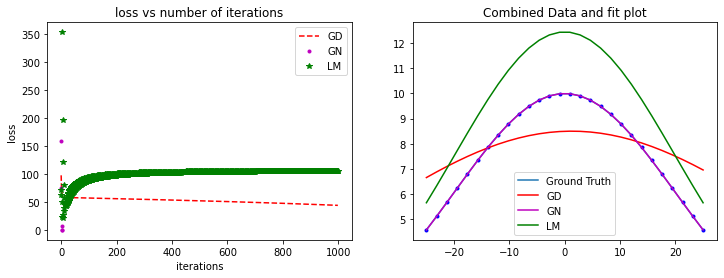

for 30 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 45.299966848650435
a_est: 8.530266296186623  m_est: 1.090785769990237  s_est: 36.90664480855761
Convergence in Gauss Newton achieved at 4  iteration
loss: 7.713311244321944e-07
a_est: 9.99998444551141  m_est: 7.426136720036641e-05  s_est: -19.999291517644988
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 105.27048650914749
a_est: 12.363640157505017  m_est: -0.0006045654816538865  s_est: 19.905074541216226


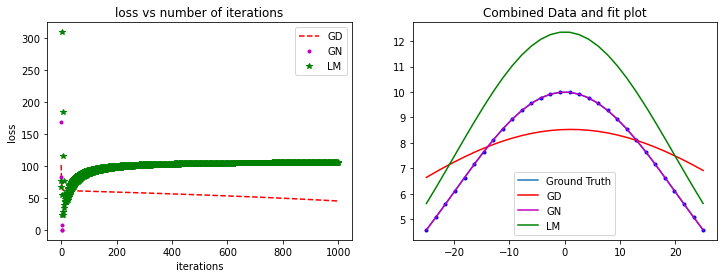

for 34 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 47.29486102353521
a_est: 8.591279251813111  m_est: 0.8043533049612996  s_est: 35.55793038241766
Convergence in Gauss Newton achieved at 4  iteration
loss: 1.0725231352600142e-06
a_est: 9.999982960979157  m_est: -7.247512050717435e-05  s_est: -19.9992106865635
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 96.86312185733587
a_est: 12.130143832669068  m_est: -0.0005320346283571396  s_est: 19.896599032699072


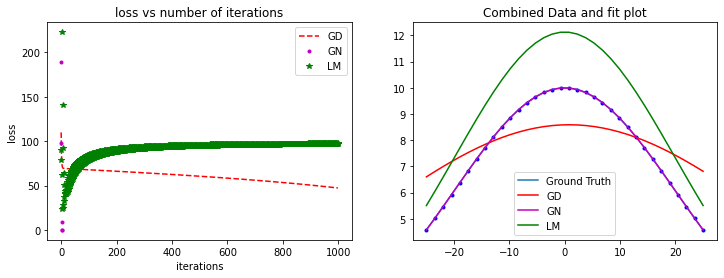

for 38 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 47.93054358865528
a_est: 8.661296291104819  m_est: 0.5656008398820976  s_est: 34.09708386814903
Convergence in Gauss Newton achieved at 4  iteration
loss: 1.4356588270651757e-06
a_est: 9.999977541954916  m_est: -0.00021181467977287802  s_est: -19.999170911885173
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 95.14237562883326
a_est: 11.996972334322663  m_est: -0.0002934508935577198  s_est: 19.891045395633544


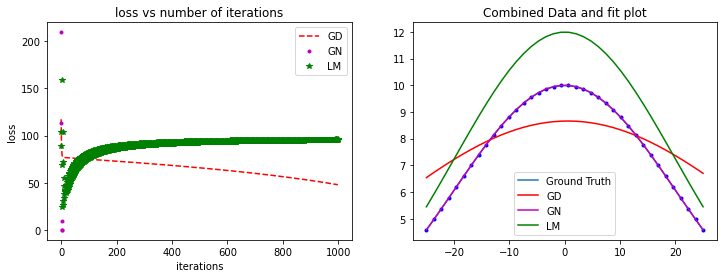

for 42 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 46.87860661320902
a_est: 8.744238877947652  m_est: 0.37375975239802733  s_est: 32.512315067848256
Convergence in Gauss Newton achieved at 4  iteration
loss: 1.8582212141455318e-06
a_est: 9.999969554277271  m_est: -0.00033833304613417603  s_est: -19.999159234519464
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 101.8574264430421
a_est: 11.964169745896386  m_est: 0.00011686995244281897  s_est: 19.88972727029737


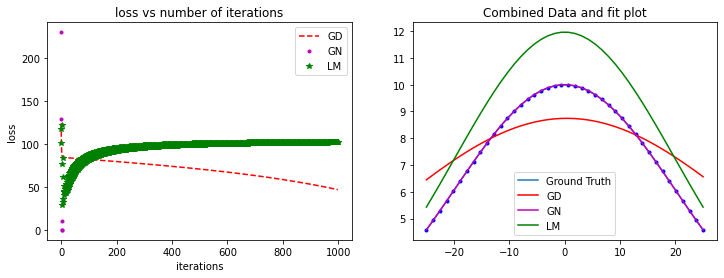

for 48 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 41.293104317267925
a_est: 8.904053626290896  m_est: 0.17026400206845044  s_est: 29.88431603467249
Convergence in Gauss Newton achieved at 4  iteration
loss: 2.589302461919011e-06
a_est: 9.999954855966209  m_est: -0.000501733335743354  s_est: -19.999174698425204
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 130.18787483193063
a_est: 12.072790818303588  m_est: 0.0009439394583992122  s_est: 19.894681570174836


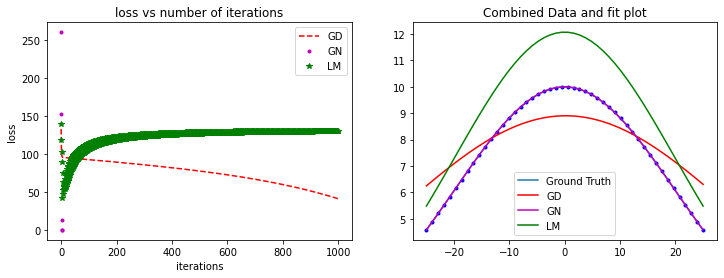

for 50 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.18849619500227
a_est: 8.969901434120136  m_est: 0.12338061041094336  s_est: 28.942726366387507
Convergence in Gauss Newton achieved at 4  iteration
loss: 2.8551279852934357e-06
a_est: 9.999949564582622  m_est: -0.000549485613638781  s_est: -19.99918552898828
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 142.10603671570735
a_est: 12.120355943730353  m_est: 0.0012465061080827282  s_est: 19.89664048117953


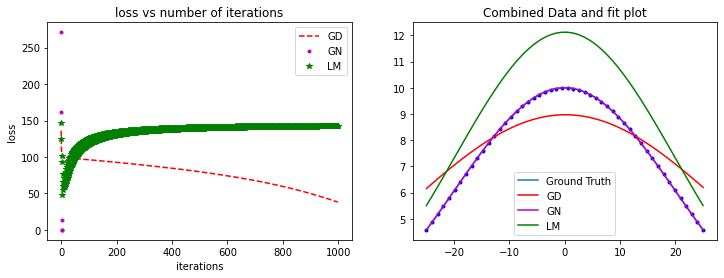

for 52 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 34.43698701348161
a_est: 9.043410858677065  m_est: 0.0859754275313151  s_est: 27.973660362755737
Convergence in Gauss Newton achieved at 4  iteration
loss: 3.1304622226266806e-06
a_est: 9.999944175140818  m_est: -0.0005941448320681483  s_est: -19.999198271901065
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 155.25170545775575
a_est: 12.171751942354444  m_est: 0.0015507774048241843  s_est: 19.898639638279146


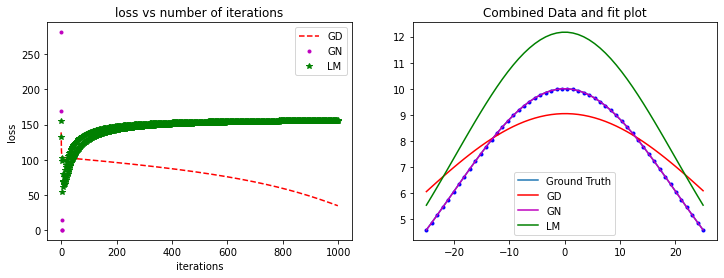

for 55 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 27.71875507100178
a_est: 9.169260586618673  m_est: 0.04575614188898691  s_est: 26.487065555748035
Convergence in Gauss Newton achieved at 4  iteration
loss: 3.5594098808815576e-06
a_est: 9.999935998972074  m_est: -0.0006557349331455034  s_est: -19.999220089665425
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 176.65741686110866
a_est: 12.250464005080323  m_est: 0.0020046141709319197  s_est: 19.901490893615346


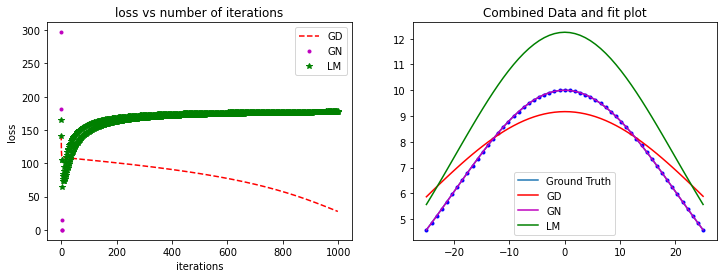

for 60 observations
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 15.147841436374154
a_est: 9.41667327868468  m_est: 0.011788756117457264  s_est: 24.06118709720934
Convergence in Gauss Newton achieved at 4  iteration
loss: 4.310422796194018e-06
a_est: 9.999922384172322  m_est: -0.0007455152165136564  s_est: -19.999261131884314
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 214.29340186593407
a_est: 12.370053238246387  m_est: 0.002763645420558354  s_est: 19.905386863196597


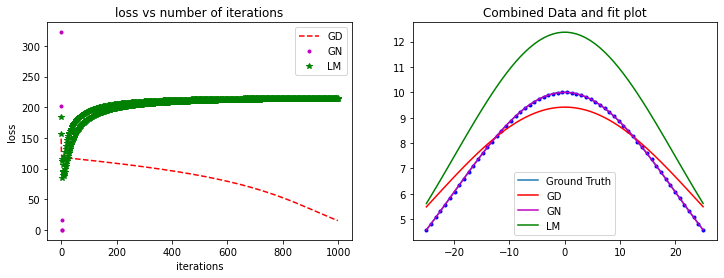

In [10]:
numberOfObservations = np.array([3,5,8,10,12,15,20,22,25,28,30,34,38,42,48,50,52,55,60])
a_gt = 10
m_gt = 0
s_gt = 50
for o in numberOfObservations:
    xObserved = np.linspace(-25, 25, o)
    a_gt = 10
    m_gt = 0
    s_gt = 20
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
    print("for", o,"observations")
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)

Add noise to your observations: Can a particular algorithm handle large noise?

for * 0.0001  noise
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.193096088233645
a_est: 8.969555773355715  m_est: 0.1252367982350555  s_est: 28.94682577533685
Convergence in Gauss Newton achieved at 4  iteration
loss: 4.1795966444853225e-05
a_est: 9.999667553850147  m_est: 0.00032196126085232146  s_est: -20.000322388262436
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 141.98170409419978
a_est: 12.119053256084639  m_est: 0.0025699159569780965  s_est: 19.898034401004452


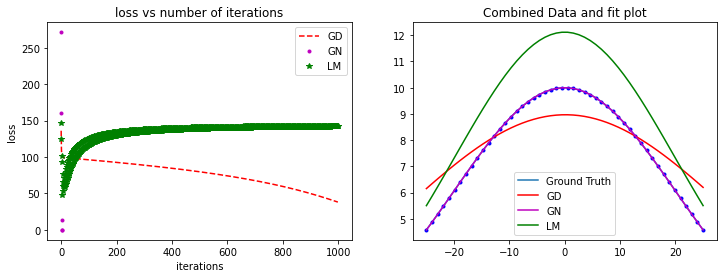

for * 0.0002  noise
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.19197575589722
a_est: 8.96932822394092  m_est: 0.12505406070156636  s_est: 28.94145104656664
Convergence in Gauss Newton achieved at 4  iteration
loss: 0.00016289820964689186
a_est: 9.999387281061287  m_est: 0.0003023310155138917  s_est: -19.998289914107886
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 143.1581055385004
a_est: 12.12846632011047  m_est: 0.0017478457069418293  s_est: 19.891614168675503


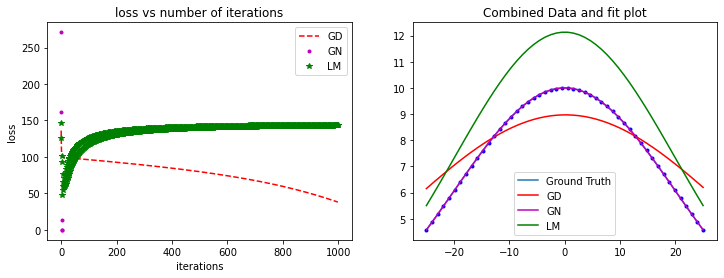

for * 0.001  noise
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.18959766561122
a_est: 8.970799311073826  m_est: 0.12190378231676306  s_est: 28.958921355372944
Convergence in Gauss Newton achieved at 4  iteration
loss: 0.0054826864078847005
a_est: 10.000855581723892  m_est: -0.001303592128047426  s_est: -20.006229986497946
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 139.4844144591966
a_est: 12.099564311365107  m_est: -0.00035017748902298716  s_est: 19.912715771529285


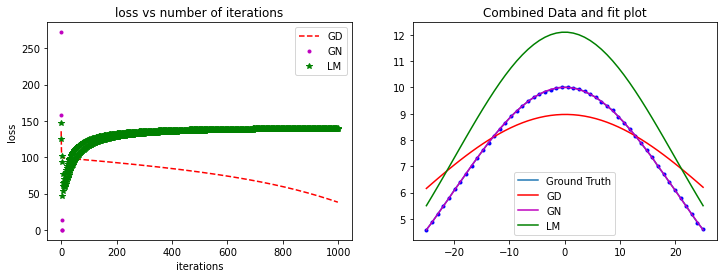

for * 0.002  noise
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.14480071873925
a_est: 8.974295076958734  m_est: 0.0825152229981225  s_est: 28.90741028495002
Gauss Newton Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.01654415486888039
a_est: 10.003506887385159  m_est: -0.021058718400751346  s_est: -19.992947480727665
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 145.6348885895557
a_est: 12.15256229016655  m_est: -0.011037047696224954  s_est: 19.877313716728487


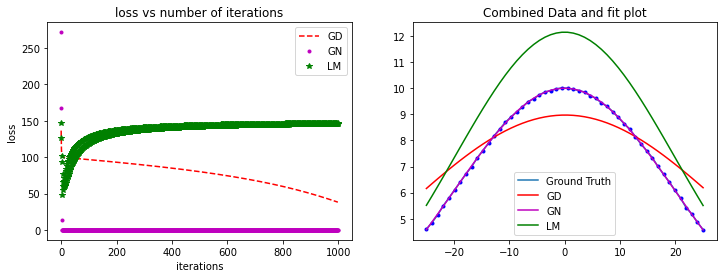

for * 0.01  noise
gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 39.13274454135572
a_est: 8.92684748367757  m_est: 0.2440382160814723  s_est: 29.248138860011107
Gauss Newton Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.43125341828966823
a_est: 9.963889523494398  m_est: 0.06593243191648876  s_est: -20.061047169370184
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 148.76271539124892
a_est: 12.152752340777926  m_est: -0.0505879816763081  s_est: 19.834877001187333


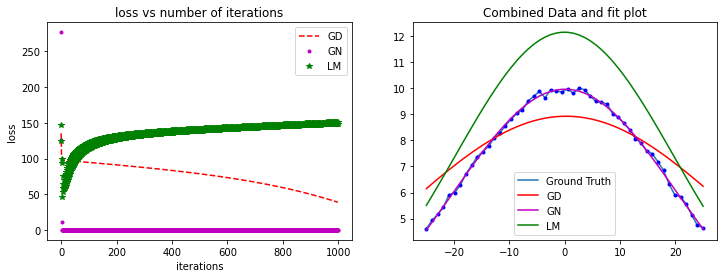

In [11]:
noise_arr = [1/10000,1/5000,1/1000,1/500,1/100]
o = 50
for n in noise_arr:
    xObserved = np.linspace(-25, 25, o)
    a_gt = 10
    m_gt = 0
    s_gt = 20
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)+np.random.normal(0,a_gt*n,o)
    print("for *", n," noise")
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)
    

For higer noise , nonce converge, for low and medium noise only Gauss Newton converges, given learning rate and tolerance kept fixed for convergence on initial conditions of no noise

gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0001
loss: 244.48737461270264
a_est: 9.918497561085035  m_est: 10.42188691583679  s_est: 21.134393038947387
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1e-05
loss: 489.0827312465777
a_est: 15.137231013938402  m_est: -5.961421724992661e-08  s_est: 15.277604102820948


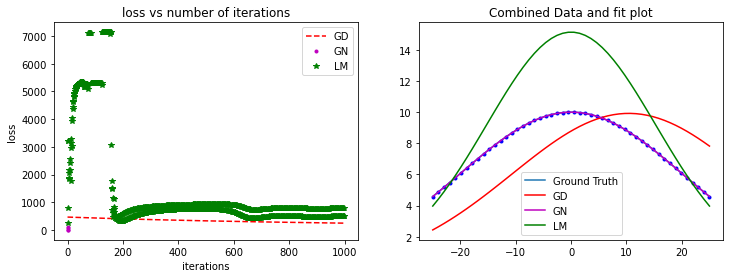

gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.001
loss: 14.123791568974372
a_est: 9.582518592742808  m_est: 1.9573486106891116  s_est: 22.74004930353681
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1e-05
loss: 1592.8342629279457
a_est: 2.4744079920171282  m_est: -7.265160695268946e-13  s_est: 1547.1150791155228


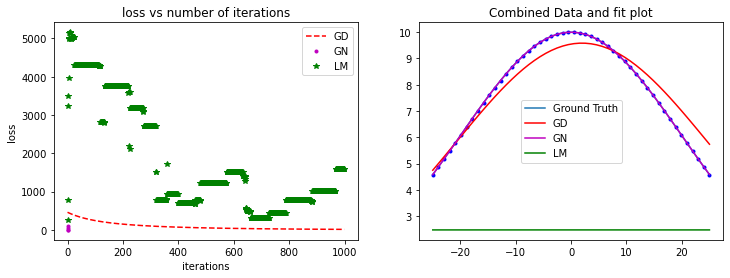

Convergence in gradient descent achieved at 337  iteration
loss: 0.09899244775254672
a_est: 9.948877534392215  m_est: 0.006139702817200705  s_est: 20.288135634862776
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1e-05
loss: 3226.679398346662
a_est: -53.16031538064012  m_est: 119.07130532441032  s_est: 12.473350567793249


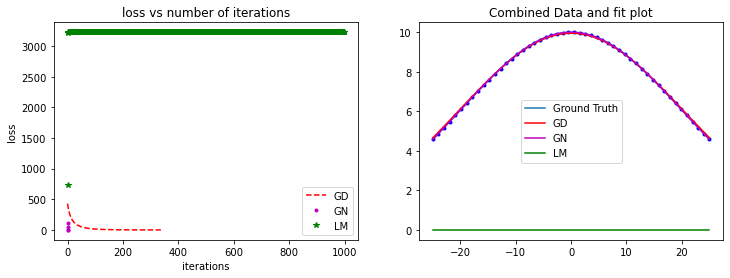

gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.1
loss: 3226.679414252767
a_est: -125.51620545318187  m_est: 80.49221057521616  s_est: -9.042245279619415
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1e-05
loss: 3226.679398346162
a_est: -1.0612884383911236  m_est: -121.46529858905251  s_est: 10.599873929428703


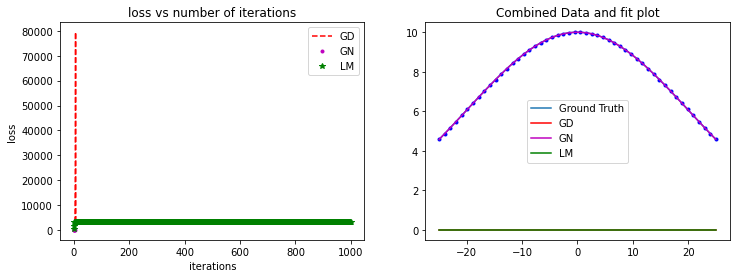

gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1.0
loss: 251.12364291814873
a_est: 440142.66885355505  m_est: -167867.68666039224  s_est: -36167.47894579422
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1e-05
loss: 40.59069405044946
a_est: 11.156814692676358  m_est: 0.030814801204144548  s_est: 19.816364681849414


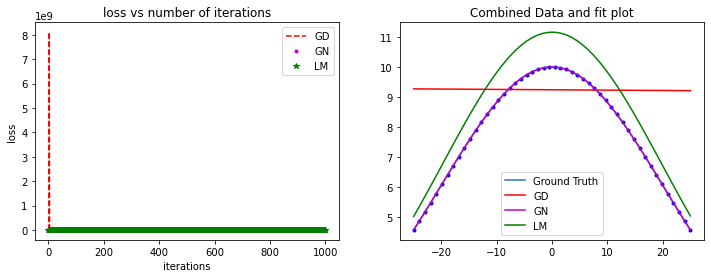

gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 2.0
loss: 3226.679398346162
a_est: -285725.2570507009  m_est: -72661.47692430415  s_est: -1907.0478644905234
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 2.0000000000000003e-06
loss: 0.307363624977623
a_est: 10.063010116045778  m_est: -0.2780036908488475  s_est: 19.9279526305328


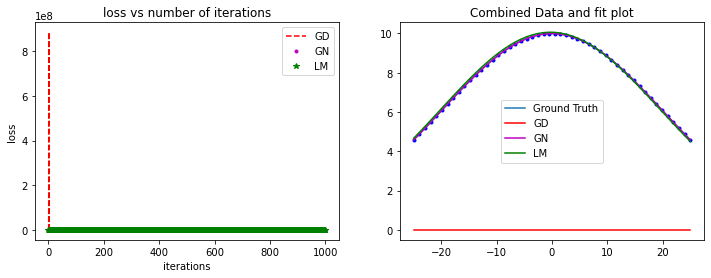

gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 3.0
loss: 8.423179077164466e+42
a_est: 3.0266628797201995e+26  m_est: -5.5626608307154726e+25  s_est: -1.070102501920274e+25
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 3.0000000000000005e-06
loss: 2.408169174734362
a_est: 9.672532453592057  m_est: -0.13484684469812486  s_est: 20.415043309697623


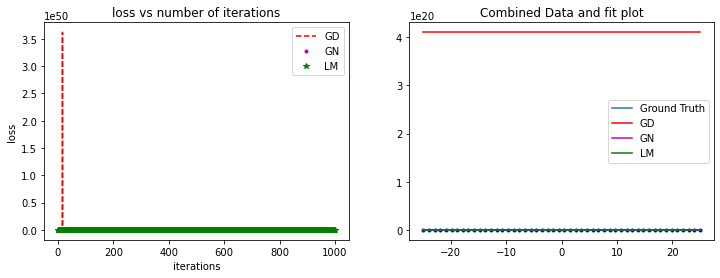

gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 4.0
loss: 3226.679398346162
a_est: -5.278964399787951e+22  m_est: -2.728357095189793e+22  s_est: 4.719937221661777e+20
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 4.000000000000001e-06
loss: 3.3400889960732494
a_est: 9.627250045766887  m_est: -0.07783985655552267  s_est: 20.357668727978876


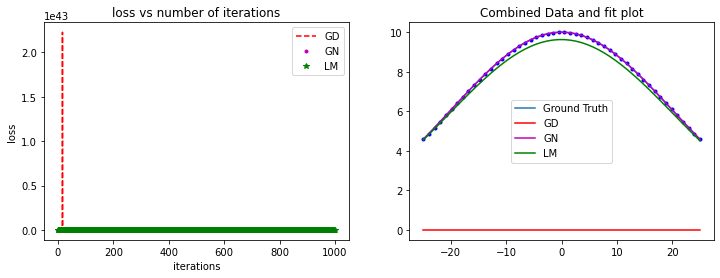

gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 5.0
loss: 3226.6793983461585
a_est: 186720.26345227615  m_est: -13284.99955973455  s_est: -1399.004163212634
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 5e-06
loss: 3.177381647386989
a_est: 9.63677523313207  m_est: -0.042887730855843215  s_est: 20.34132836839303


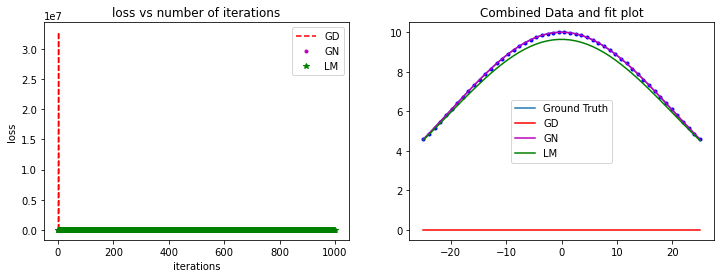

gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 8.0
loss: 3226.6793985238173
a_est: -2094.2695584751345  m_est: -436.9266543183346  s_est: 55.275255914070016
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 8.000000000000001e-06
loss: 4.317287934035757
a_est: 9.585864525397142  m_est: 0.05843422330808384  s_est: 20.32878472999195


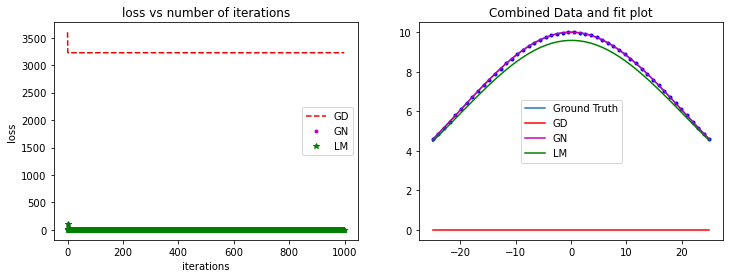

gradient descent algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 10.0
loss: 3226.679398346162
a_est: -3169.1548473035214  m_est: -591.1815735283033  s_est: 16.740048387473166
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1e-05
loss: 7.725367181265507
a_est: 9.46380697983507  m_est: 0.07721116212084483  s_est: 20.31383197715235


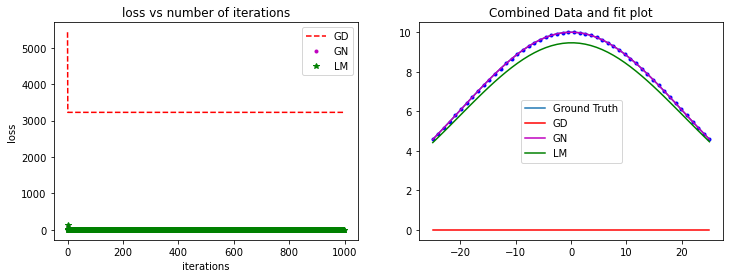

In [12]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
learningrate = np.array([0.0001,0.001,0.01,0.1,1,2,3,4,5,8,10])

for l in learningrate:    
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,l,1e-1)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,l,1e-1)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,l,1e-1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)

## Answers for Question 1
Add explanations for the answers along with tables here.
### Answer for 1.1
We experiment intensively as shown in figures shown above and report some of our experimentations. <br>
**observed trends** <br> 1) if learning rate is increased too much or decreased a lot Gradient descent algorithm doesnt converge. <br>
Explanation: because gradient descent would take much smaller or much larger steps in above case hence it doesnt converge. <br>
2)Decrease in tolerance results in decrease in loss and number of iterations<br>
Explnation: Algorithm loop breaks when that tolerance is achieved. For smaller tolerance it thus converges earlier. Also loss is monotonically decreasing hence more loss in observed at earleir convergence.


| Learning rate        | tolerance           | loss  |num of iterations to converge |
| ------------- |:-------------:| -------:|-------:|
| 0.01    | 1e-2     | 0.0098 |437 |
| 0.01    | 1e-1    | 0.098 |337 |
| 0.1    | 1e-2     | 0.0098|437 |
| 1    | 1e-1    | 0.098 |337 |
| 0.0001    | 1e-2   | 244.49(at iter 999) |didnt converge in 999 iterations |
| 0.001    | 1e-2  | 14.12(at iter 999)|didnt converge in 999 iterations |
| 0.01    | 1e-2    | 0.0098 |437 |
| 0.1    | 1e-2  | 3226.67(at iter 999) |didnt converge in 999 iterations |
| 1   | 1e-2   | 251.123(at iter 999) |didnt converge in 999 iterations |

### Answer for 1.2
**Learning rate** 0.01 for Gradient Descent and Gauss Newton
10 for LM <br>
**tolerance** 1e-2 for Gradient Descent and Gauss Newton
1e+1 for LM <br>
The Gradient Descent, Gauss Newton and LM converge for above values in given extimate of  s_gt = 20, a_est = 10, m_est = 13, s_est = 19.12 and 50 observations. <br>
Thus learning rate and tolerance kept fixed for below experimentations in order to find a good comparison of changes from initial convergence. Also in row (for Different initial estimate say) only that row's mentioned change is there, rest all params are kept fixed.


| Action      |  Gradient Descent          | Gauss Newton  |LM   |
| ------------- |:-------------:| -------:|-------:|
| learning rate 10, tolerance 1e+1 | did'nt converge in  999 iters, loss:3226.67  | Converges in 2 iters(loss: 0.933)|  Converges in 2 iter(loss:5.730) |
| learning rate 1, tolerance 1e+1 | did'nt converge in  999 iters, loss:3226.67  | Converges in 2 iters(loss: 0.933)|  Converges in 2 iter(loss:5.730) |
| learning rate 0.0001 | doesnt converge in 999 iters (loss: 244.48)    | 3(loss: ~0)|  doesnt converge |
| #Iterations(for tolerance 1e-2) | 437(loss: 0.0098)    | 3(loss: ~0)|  doesnt converge |
| #Iterations(tolerance 1e-1) | 337(loss: 0.098)   | 3(loss: ~0)|  doesnt converge |
| #Iterations(tolerance 1) | 229(loss:0.987)   | 2(loss: 0.933)|  doesnt converge |
| #Iterations(tolerance 1e+1) | 115 (loss: 9.829)   | 2(loss: 0.933)|  2(loss: 5.73) |
| Different Initial estimate[a,m,s]: far different [  | does'nt converge     | converges|does'nt converge |
| bit different |converges| converges|doesnt converge|
| Different number of observations: v small(<5)  | does'nt converge     | converges|converges |
| small(<=20) |does'nt converge | converges|converges|
| medium(<=42) |does'nt converge | converges|converges|
| large(>=48) |converges | converges|converges|
| on adding small noise  | does'nt converge     | converges|does'nt converge |
| on adding medium noise  | does'nt converge     | does'nt converge|does'nt converge |




Gauss newton converges is lesser iterations and achieves similar loss. Also on varying initial estimates, number of observations and addition of noise Gauss newton is seen to perform well. Though LM is expected to combine pros of both Gradient descent and Gauss Newton it is not able to do so since the learning rate is actually increased way too much(by a factor of 10) and it would overshoot the optima. The gradient descent is not seen to converge on larger learning rates since it would overshoot the minima and keep oscilating. <br>
When learning rate is too small(0.01) Levenberge Marquardt doesnt converge for 1000 iterations whereas Gauss newton does converge.
However we found that on increasing learning rate to 10 along with increasing tolerance, gauss newton converges in 2 iterations with 5.73 loss. 

# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 

Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [13]:
# HELPER FUNCTIONS: DON'T EDIT THIS BLOCK - If you want to test on more cases, you can add code to this block but
# DON'T delete existing code.


# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
  plt.cla()
  plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
  plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
  plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
  plt.legend(('X', 'P', 'P0'), loc='lower left')
  plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
  plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
  plt.axis([-10, 15, -10, 15])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.draw()
  plt.pause(2)
  return

# Generating data for our simple ICP
def generate_data():
  
  # create reference data  
  X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
  # add noise
  P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
  # translate
  P[0,:] = P[0,:] + 1
  P[1,:] = P[1,:] + 1
  
  # rotate
  theta1 = ( 10.0 / 360) * 2 * np.pi
  theta2 = (110.0 / 360) * 2 * np.pi
  rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
  rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
  # sets with known correspondences
  P1 = np.dot(rot1, P)
  P2 = np.dot(rot2, P)
  
  return X, P1, P2

In [14]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
# Replace "pass" statement with your code
def rms(X,P):
    return np.sqrt(np.sum(np.square(X-P))/X.shape[1])
def centroid(arr):
    return np.mean(arr, axis=1)
    #return (1/arr.shape[0])*np.sum(X)
# TODO1: Get data X, P1, P2 from helper function generate_data(). 
X, P1, P2 = generate_data()
# TODO2: Apply ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5 #Experiment & check if your theoretical understanding is correct.
    P0 = P #Initialization
    for i in range(num_iter):
        # implementing ICP:
        # TODO2.1: what's current error?
        rmse = rms(X,P)
        # TODO2.2: call visualization helper function plot_icp.
        plot_icp(X, P, P0, i, rmse)
        # TODO2.3: Implement ICP to get R, t
        #Compute the centroids of each point cloud
        ux = centroid(X)
        ux = ux.reshape(ux.shape[0],1)
        up = centroid(P)
        up = up.reshape(up.shape[0],1)
        #Compute a matrix capturing the spread of the two point clouds
        w = (1/X.shape[1])*np.dot((X.astype(np.float)- ux),(P.astype(np.float)- up).T)
        #Use the singular value decomposition of the matrix to get the optimal rotation
        u, s, v_t = np.linalg.svd(w, full_matrices=True)
#         d = np.linalg.det(u)*np.linalg.det(v_t)  
#         R = np.array([[1,0],[0,d]])
        R = u @ v_t
        #Use the optimal rotation to get the optimal translation by aligning the centroids
        t = (ux - R@up)
        t = t.reshape(t.shape[0],1)
        P = np.dot(R,P) + t #Uncomment this: transforming my current point cloud towards initial point cloud
    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

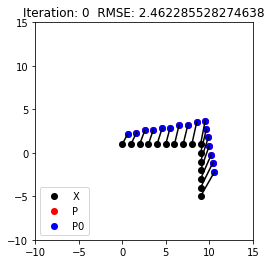

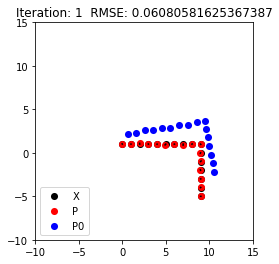

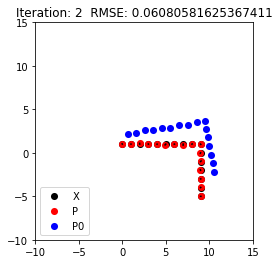

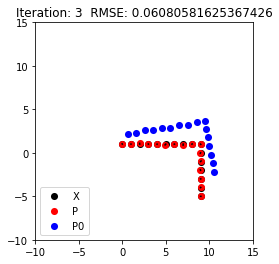

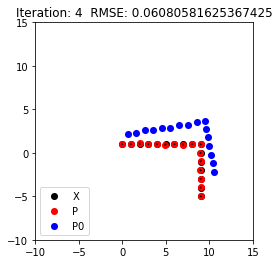

In [15]:
# Call ICP on P1 & P2
ICP(X,P1) 



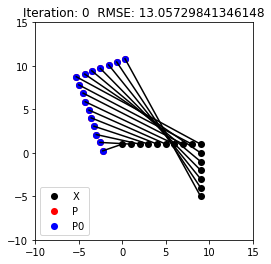

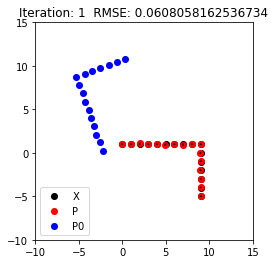

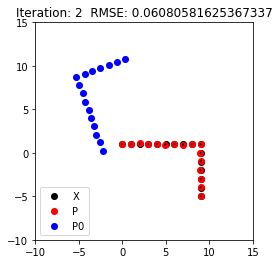

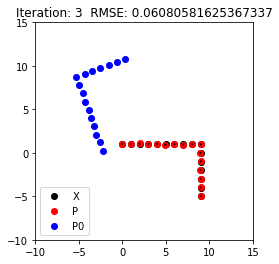

In [ ]:
ICP(X,P2) 